## Stage 1: Installing dependencies and notebook gpu setup

In [ ]:
!pip install tensorflow
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 7.2 kB/s 
     |████████████████████████████████| 1.7 MB 42.1 MB/s 
     |████████████████████████████████| 6.0 MB 38.5 MB/s 
     |████████████████████████████████| 439 kB 65.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    F

## Stage 2: Importing dependencies for the project

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.11.0'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [ ]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


### Image normalization

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

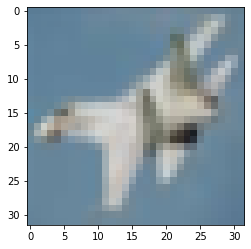

In [ ]:
plt.imshow(X_test[10])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [ ]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [ ]:
model.add(tf.keras.layers.Flatten())

### Adding MISH

In [ ]:
def mish(inputs):
    x = tf.nn.softplus(inputs)
    x = tf.nn.tanh(x)
    x = tf.multiply(x, inputs)
    return x

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation=mish))

### Adding the second hidden layer

In [ ]:
model.add(tf.keras.layers.Dense(units=64, activation=mish))

### Adding Dropout

In [ ]:
model.add(tf.keras.layers.Dropout(0.34))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [ ]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4256 - sparse_categorical_accuracy: 0.4851
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9520 - sparse_categorical_accuracy: 0.6687
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7679 - sparse_categorical_accuracy: 0.7345
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6330 - sparse_categorical_accuracy: 0.7808
Epoch 5/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5124 - sparse_categorical_accuracy: 0.8210
Epoch 6/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4155 - sparse_categorical_accuracy: 0.8549
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3301 - sparse_categorical_accuracy: 0.8849
Epoch 8/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2677 - sparse_categorical_accuracy: 0.9072
Epoch 9/15
1563/1563 [=========

### Model evaluation and prediction

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6077 - sparse_categorical_accuracy: 0.7234


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7233999967575073
